In [1]:
import torch as t
import torchvision as tv

transform = tv.transforms.Compose([
    tv.transforms.ToTensor(),
    tv.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

trainset = tv.datasets.CIFAR10(
        root="./data", train=True, download=True, transform=transform)
trainloader = t.utils.data.DataLoader(
        trainset, batch_size=4, shuffle=True, num_workers=2)

testset = tv.datasets.CIFAR10(
        root="./data", train=False, download=True, transform=transform)
testloader = t.utils.data.DataLoader(
        testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


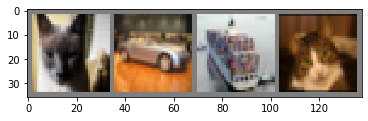

cat car ship cat


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def imshow(img):
    img = img / 2 + 0.5
    plt.imshow(np.transpose(img.numpy(), (1, 2, 0)))
    plt.show()
    
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(tv.utils.make_grid(images))
print(" ".join(classes[labels[j]] for j in range(4)))

In [5]:
print(images[0].shape)

torch.Size([3, 32, 32])


In [11]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # in, out, kernel, stride=1
        self.pool = nn.MaxPool2d(2, 2)  # kernel, stride
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

In [12]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(2):
    
    running_loss = 0.0
    for i, data in enumerate(trainloader):
        inputs, labels = data
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print("Done training")

[1,  2000] loss: 2.212
[1,  4000] loss: 1.897
[1,  6000] loss: 1.705
[1,  8000] loss: 1.598
[1, 10000] loss: 1.516
[1, 12000] loss: 1.483
[2,  2000] loss: 1.407
[2,  4000] loss: 1.408
[2,  6000] loss: 1.357
[2,  8000] loss: 1.341
[2, 10000] loss: 1.322
[2, 12000] loss: 1.307
Done training


In [14]:
PATH = './cifar_net.pth'
t.save(net.state_dict(), PATH)

In [ ]:
net = Net()
net.load_state_dict(t.load(PATH))

correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predic)
images, labels = dataiter.next()

